# Quantitative Analysis of Bitcoin and Binancecoin

Diversification of assets is an important part of successful investment management. To some extent, the diversification may be measured by the correlation of assets within the portfolio.  

The purpose of this project is to experiment with this concept in the cryptocurrency market and quantify the correlation between two major currencies, Bitcoin and Binancecoin, and test the feasibility of predictive modeling with machine learning.  

The dataset was obtained from Usama Buttar on Kaggle at the following url:  
https://www.kaggle.com/datasets/usamabuttar/cryptocurrency-historical-prices-updated-daily  

In [1]:
# import libraries
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\mwate\\Python'

#### Obtaining and cleaning the BNB data

In [2]:
# create new DataFrame object with Binancecoin data
df_BNB = pd.read_csv('BNB_BNB.csv')
df_BNB.shape 

(1991, 7)

In [3]:
# preview first 20 entries
df_BNB.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
1,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
3,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
4,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800
5,2017-11-14,1.68928,1.73537,1.56827,1.59258,1.59258,7829600
6,2017-11-15,1.58777,1.62498,1.49550,1.53045,1.53045,7615500
7,2017-11-16,1.55619,1.68222,1.53689,1.57792,1.57792,8928640
8,2017-11-17,1.58005,1.58266,1.49530,1.51036,1.51036,8508840
9,2017-11-18,1.51136,1.67678,1.49823,1.67433,1.67433,32167300


In [4]:
# create new columns for BNB average price and daily change
df_BNB['avg_price'] = (df_BNB['High'] + df_BNB['Low']) / 2 
df_BNB['change'] = (df_BNB['Close'] - df_BNB['Open'])
df_BNB # preview DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200,2.034085,-0.062370
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000,1.857125,-0.210890
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150,1.766020,-0.115810
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700,1.567680,-0.149200
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800,1.626310,0.160610
...,...,...,...,...,...,...,...,...,...
1986,2023-04-18,340.044769,346.493042,337.859314,343.193451,343.193451,741280408,342.176178,3.148682
1987,2023-04-19,343.169617,343.529907,321.052032,322.707520,322.707520,826810466,332.290970,-20.462097
1988,2023-04-20,322.587738,326.552521,315.902191,317.889923,317.889923,663981561,321.227356,-4.697815
1989,2023-04-21,317.921112,331.417175,316.116943,321.674988,321.674988,1057530805,323.767059,3.753876


In [5]:
# check for odd datatypes
df_BNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1991 non-null   object 
 1   Open       1991 non-null   float64
 2   High       1991 non-null   float64
 3   Low        1991 non-null   float64
 4   Close      1991 non-null   float64
 5   Adj Close  1991 non-null   float64
 6   Volume     1991 non-null   int64  
 7   avg_price  1991 non-null   float64
 8   change     1991 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 140.1+ KB


In [6]:
# convert date datatype from object to pd DateTime
df_BNB['Date'] = pd.to_datetime(df_BNB['Date'], format='%Y-%m-%d')

#### Obtaining and cleaning the BTC data

In [7]:
# get bitcoin data
df_BTC = pd.read_csv('BTC_Bitcoin.csv')

In [8]:
# define two new columns with the average daily price and daily change
df_BTC['avg_price'] = (df_BTC['High'] + df_BTC['Low']) / 2
df_BTC['change'] = (df_BTC['Close'] - df_BTC['Open'])
df_BTC.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,460.298004,-8.529999
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,434.981995,-32.419983
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,406.183502,-29.307007
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,406.589493,14.230988
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,402.803497,-9.263977
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,402.022995,3.052002
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,418.876999,33.698975
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,428.621994,-12.546021
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,416.493988,-11.582001
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800,407.473495,-7.003998


In [9]:
# preview the last entries of BTC DataFrame
df_BTC.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312
3139,2023-04-22,27274.150391,27385.095703,27175.154297,27338.378906,27338.378906,19185252352,27280.125000,64.228516


In [10]:
# check for odd datatypes
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3140 non-null   object 
 1   Open       3140 non-null   float64
 2   High       3140 non-null   float64
 3   Low        3140 non-null   float64
 4   Close      3140 non-null   float64
 5   Adj Close  3140 non-null   float64
 6   Volume     3140 non-null   int64  
 7   avg_price  3140 non-null   float64
 8   change     3140 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 220.9+ KB


In [11]:
# replace 'Date' column object with datetime format
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'], format='%Y-%m-%d')

#### Visualizing relative prices  

Because bitcoin and binancecoin are much different in price, in order to view their changes easily on one graph we will normalize the prices to a range between 0 and 100.

In [12]:
# normalization
def norm(x, x_max, x_min): # define min/max normalizing function
    x_norm = ((x - x_min)/(x_max - x_min))*100
    return x_norm

In [13]:
# add columns of normalized average price to bitcoin and then display
df_BTC['norm_price'] = df_BTC['avg_price'].apply(lambda x: norm(x, df_BTC['avg_price'].max(), df_BTC['avg_price'].min()))
df_BTC

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,460.298004,-8.529999,0.390428
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,434.981995,-32.419983,0.352788
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,406.183502,-29.307007,0.309971
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,406.589493,14.230988,0.310574
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,402.803497,-9.263977,0.304945
...,...,...,...,...,...,...,...,...,...,...
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938,44.031424
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812,43.626866
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312,42.164378
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312,40.985104


In [14]:
# add columns of normalized average price to binancecoin and then display
df_BNB['norm_price'] = df_BNB['avg_price'].apply(lambda x: norm(x, df_BNB['avg_price'].max(), df_BNB['avg_price'].min()))
df_BNB

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200,2.034085,-0.062370,0.075784
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000,1.857125,-0.210890,0.048698
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150,1.766020,-0.115810,0.034752
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700,1.567680,-0.149200,0.004393
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800,1.626310,0.160610,0.013367
...,...,...,...,...,...,...,...,...,...,...
1986,2023-04-18,340.044769,346.493042,337.859314,343.193451,343.193451,741280408,342.176178,3.148682,52.140380
1987,2023-04-19,343.169617,343.529907,321.052032,322.707520,322.707520,826810466,332.290970,-20.462097,50.627279
1988,2023-04-20,322.587738,326.552521,315.902191,317.889923,317.889923,663981561,321.227356,-4.697815,48.933803
1989,2023-04-21,317.921112,331.417175,316.116943,321.674988,321.674988,1057530805,323.767059,3.753876,49.322548


In [15]:
# change the default column to 'Date'
df_BNB.index = df_BNB['Date']

Next, remove all the rows from BTC values that correspond to dates before BNB existed. This data is irrelevant.

In [16]:
# Create new DataFrame with only the prices of bitcoin from after November 9 2017
BTC = df_BTC.loc[(df_BTC['Date'] >= '2017-11-09')]
BTC

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
1149,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,7274.175049,-303.250000,10.521307
1150,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,6874.435059,-555.589844,9.926973
1151,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,6538.685059,-261.009766,9.427780
1152,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,6072.029785,-345.380371,8.733956
1153,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,6327.739990,621.240234,9.114147
...,...,...,...,...,...,...,...,...,...,...
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938,44.031424
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812,43.626866
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312,42.164378
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312,40.985104


In [17]:
# reset the index to count from 0 and replace default index with date
BTC.reset_index(inplace=True)
BTC.index = BTC['Date']
BTC

,index,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
Date,,,,,,,,,,,
2017-11-09,1149,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,7274.175049,-303.250000,10.521307
2017-11-10,1150,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,6874.435059,-555.589844,9.926973
2017-11-11,1151,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,6538.685059,-261.009766,9.427780
2017-11-12,1152,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,6072.029785,-345.380371,8.733956
2017-11-13,1153,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,6327.739990,621.240234,9.114147
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18,3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938,44.031424
2023-04-19,3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812,43.626866
2023-04-20,3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312,42.164378


Plot the normalized average daily prices on a line graph to visualize them.

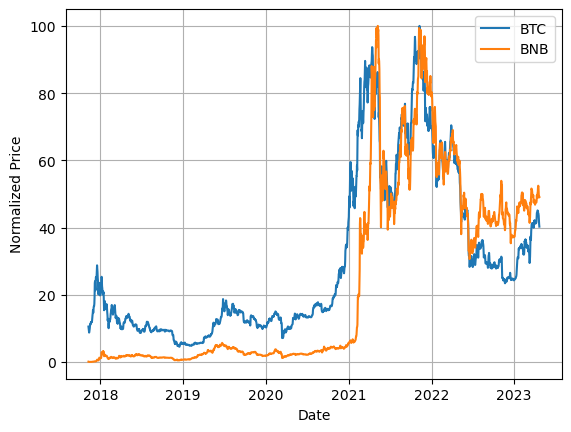

In [18]:
sns.lineplot(BTC['norm_price'], label='BTC')
sns.lineplot(df_BNB['norm_price'], label='BNB')
plt.ylabel("Normalized Price")
plt.grid()
plt.legend()
plt.show()

Now we can see the relative changes in price over both histories. It is clear that we can expect some form of correlation between the two. Some interesting features to note are the apparent lag in price jump of BNB behind BTC at the start of 2021, and from mid 2022 onward BNB seems to have performed better than BTC.

#### Set up the correlation calculation

The next step is to make a new DataFrame with two columns, one for each currency change and then call the ```.corr()``` method to determine correlation.

In [19]:
# create the new DataFrame
price_changes = BTC[['change']].copy() # create new df
price_changes['BNB_change'] = df_BNB['change'].copy() # add column to new df
price_changes.rename(columns={'change': 'BTC_change'}, inplace=True) # rename column
price_changes['BTC_price'] = BTC[['avg_price']].copy()
price_changes['BNB_price'] = df_BNB[['avg_price']].copy()
price_changes.index = BTC['Date'] # change the index to the date

Check for any null entries.

In [20]:
# compute sum of null entries
print(price_changes['BNB_change'].isna().sum(), price_changes['BTC_change'].isna().sum())

0 0


In [21]:
# display preview of new df
price_changes.tail()

,BTC_change,BNB_change,BTC_price,BNB_price
Date,,,,
2023-04-18,948.460938,3.148682,29812.576172,342.176178
2023-04-19,-1571.507812,-20.462097,29540.476562,332.290970
2023-04-20,-577.695312,-4.697815,28556.829102,321.227356
2023-04-21,-972.320312,3.753876,27763.666992,323.767059
2023-04-22,64.228516,1.425232,27280.125000,322.157532


Now that the data is ready, call the ```.corr()``` method to compute the correlation matrix.

In [22]:
# compute correlation matrix
price_changes.corr()

,BTC_change,BNB_change,BTC_price,BNB_price
BTC_change,1.000000,0.655376,-0.003440,-0.049280
BNB_change,0.655376,1.000000,0.036382,-0.002126
BTC_price,-0.003440,0.036382,1.000000,0.883330
BNB_price,-0.049280,-0.002126,0.883330,1.000000


#### Interpreting the results

The important results of this symmetric matrix are the off-diagonal entries. The computed values of 0.655376 indicate a  positive correlation, which means that when Bitcoin increases or decreases, Binancecoin tends to do the exact same thing. A cutoff value of 0.7 or greater is generally considered a strong correlation. The values along the main diagonal are the correlation of each asset with itself, which is of course perfect. The values from a correlation matrix range from -1 to +1, with -1 meaning that when one increases, the other decreases. Values near zero indicate no correlation.  

It is important to keep in mind that correlation coefficients are dynamic and should not be assumed to remain constant over time.

In [23]:
# save results as a csv
#price_changes.to_csv('crypto_price_changes.csv')

In [24]:
price_changes.index

DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18',
               ...
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22'],
              dtype='datetime64[ns]', name='Date', length=1991, freq=None)

## Employing a machine learning model

The next section is training a supervised model on the dataset to evaluate its performance on predicting prices of BNB based on the performance of BTC. Because this is a regression problem, the model chosen is Support Vector Regression from ```sklearn```.

In an SVR model, the goal is to provide the best fit line through the parameter space. In this case, the parameter space is two-dimensional so it is helpful to visualize it on a scatterplot. 

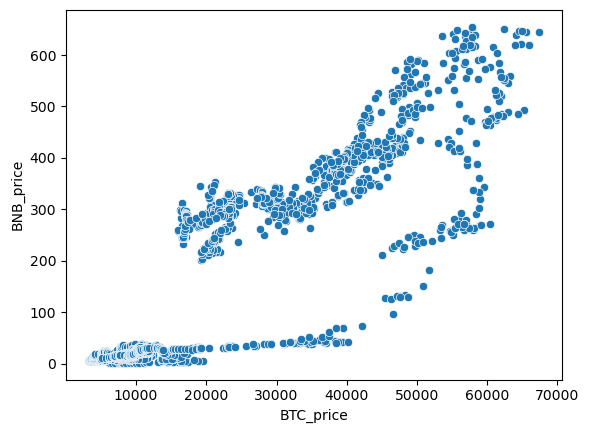

In [25]:
# create a scatterplot of the data
sns.scatterplot(data=price_changes, x='BTC_price', y='BNB_price')
plt.show()

The data is nonlinear and the central cluster will be hard to model without losing the shape of the data in the lower part of the graph. Because of this, we will augment the data by adding an additional feature of time to make a 3d projection and hopefully clarify some features.

In [26]:
# import modules
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from mpl_toolkits import mplot3d

In [65]:
# reset index because 3d plot can't read pd.DateTime format
price_changes.reset_index(inplace=True)
price_changes['timestep'] = price_changes.index.values
price_changes

,Date,BTC_change,BNB_change,BTC_price,BNB_price,timestep
0,2017-11-09,-303.250000,-0.062370,7274.175049,2.034085,0
1,2017-11-10,-555.589844,-0.210890,6874.435059,1.857125,1
2,2017-11-11,-261.009766,-0.115810,6538.685059,1.766020,2
3,2017-11-12,-345.380371,-0.149200,6072.029785,1.567680,3
4,2017-11-13,621.240234,0.160610,6327.739990,1.626310,4
...,...,...,...,...,...,...
1986,2023-04-18,948.460938,3.148682,29812.576172,342.176178,1986
1987,2023-04-19,-1571.507812,-20.462097,29540.476562,332.290970,1987
1988,2023-04-20,-577.695312,-4.697815,28556.829102,321.227356,1988
1989,2023-04-21,-972.320312,3.753876,27763.666992,323.767059,1989


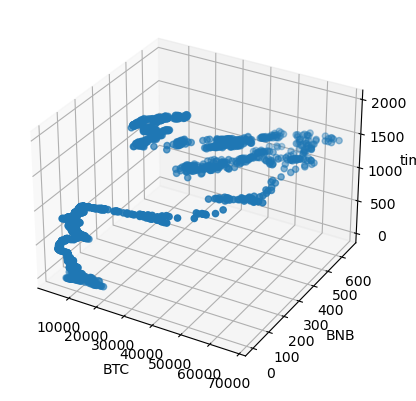

In [66]:
# create 3d plot
%matplotlib inline
plot = plt.figure().add_subplot(projection='3d')
plot.scatter(price_changes['BTC_price'], price_changes['BNB_price'], price_changes['timestep'])
plt.xlabel('BTC')
plt.ylabel('BNB')
plot.set_zlabel('time');

The 3d graph spreads the data out and will be easier for the regression model to recognize patterns.

___  
### Preprocessing 
Processing the data into a suitable form for the regression model.

# divide data into testing and training sections
X_train, X_test, y_train, y_test = train_test_split((price_changes['BTC_price'], price_changes['timestep']), \
                                                    price_changes['BNB_price'], shuffle=False, random_state=0,\
                                                   test_size=0.2, train_size=0.8)

In [100]:
# manually create training and testing data
training_percent = 0.8
X_train = price_changes.loc[price_changes.index <= price_changes.index.max()*training_percent, ['BTC_price', 'timestep']]
X_test = price_changes.loc[price_changes.index > price_changes.index.max()*training_percent, ['BTC_price', 'timestep']]
y_train = price_changes.loc[price_changes.index <= price_changes.index.max()*training_percent, ['BNB_price']]
y_test = price_changes.loc[price_changes.index > price_changes.index.max()*training_percent, ['BNB_price']]

In [101]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (1593, 2), X_test: (398, 2), y_train: (1593, 1), y_test: (398, 1)


Convert the data to numpy arrays and reshape to (-1,1) for the ```.fit()``` and ```.predict()``` methods.

In [48]:
# convert to numpy array
X_train = np.asarray(X_train).reshape(-1,1)
X_test = np.asarray(X_test).reshape(-1,1)
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

For the SVM model, the data should be scaled to the interval $[0,1]$.

In [106]:
# scale the data using .fit_transform() for training data and .transform() for test data
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train['BTC_price'] = scaler.fit_transform(X_train['BTC_price'].values.reshape(-1,1)) # scales to [0,1]
X_train['timestep'] = scaler.fit_transform(X_train['timestep'].values.reshape(-1,1))
X_test['BTC_price'] = scaler.transform(X_test['BTC_price'].values.reshape(-1,1)) # .transform() doesnt scale to [0,1]
y_train['BNB_price'] = scaler.fit_transform(y_train['BNB_price'].values.reshape(-1,1)) 
y_test['BNB_price'] = scaler.transform(y_test['BNB_price'].values.reshape(-1,1))

1593    0.598833
1594    0.613907
1595    0.617479
1596    0.627146
1597    0.630921
          ...   
1986    0.521404
1987    0.506273
1988    0.489338
1989    0.493225
1990    0.490762
Name: BNB_price, Length: 398, dtype: float64

In [50]:
# check data shape again
print(y_train.shape, y_test.shape, X_train.shape, X_test.shape)

(1592, 1) (399, 1) (1592, 1) (399, 1)


Show the scaled parameter space.

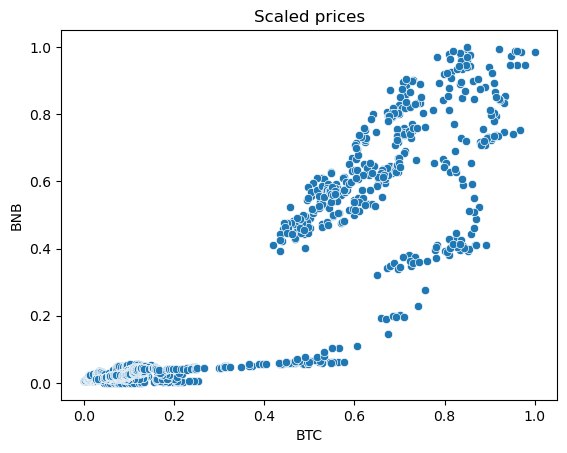

In [53]:
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten())
plt.xlabel('BTC')
plt.ylabel('BNB')
plt.title('Scaled prices')
plt.show()

___  
### Training and predictions
There are now four data sets. ```X_train``` is the array of values of BTC for training and ```y_train``` is the array of BNB values for training. ```X_test``` and ```y_test``` are the remaining arrays that will not be seen by the model during fitting and thus may be used to evaluate the model's predictive performance.  
The next step is to select hyperparameters and train the model.

In [55]:
# initialize the model with no hyperparameters
model = SVR()

Find the optimal SVR hyperparameters using a grid search. Epsilon is the support vector margins.

In [57]:
# perform grid search
parameters = {'kernel': ['rbf', 'poly'], \
              'C':[6,7],\
              'gamma': [1e-9, 1e-7, 1e-1],\
              'epsilon':[0.1,0.2,0.3,0.4]}
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train[:,0])
params = clf.best_params_
params

{'C': 6, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

Define and run the model with optimized hyperparameters.

In [59]:
# reinitialize model with new parameters and fit data
model = SVR(kernel=params['kernel'], gamma=params['gamma'], C=params['C'], epsilon=params['epsilon'])
model.fit(X_train, y_train[:,0])

SVR(C=6, gamma=0.1)

Now that the model is trained, the next step is to make predictions and test their accuracy.

In [60]:
# use model to make predictions
y_pred = model.predict(X_test).reshape(-1,1)

In [61]:
# inverse scaling
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)
X_test = scaler.inverse_transform(X_test)

___
### Results   

#### Accuracy score

In [62]:
# evaluate prediction
mape = mean_absolute_percentage_error(y_test[:,0], y_pred[:,0])
print(f'The mean absolute percent error is {mape*100}%')

The mean absolute percent error is 49.24452222603371%


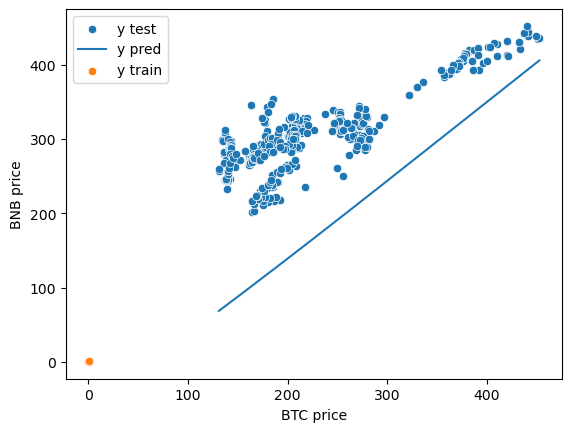

In [63]:
# plot the results
#sns.lineplot(y_pred[:,0], label='Predicted BNB Price')
#sns.lineplot(y_test[:,0], label='Actual BNB Price')
#sns.lineplot(X_test[:,0], label='Bitcoin Price (scaled)')
sns.scatterplot(x=X_test[:,0], y=y_test[:,0], label='y test')
sns.lineplot(x=X_test[:,0], y=y_pred[:,0], label='y pred')
sns.scatterplot(x=X_train[:,0], y=y_train[:,0], label='y train')
plt.ylabel('BNB price')
plt.xlabel('BTC price')
plt.legend()
plt.show()

#### Discussion
The model predicts the price of BNB with an error estimate of around 4.4%. Several different splits of the training data were tested before deciding on this 100 day period. 